# Project 1-Team 2

Contributors:
 
B.Kidston || J.Enkhbaatar|| X. Liu (Kate) || N. Girdharry || S. Akiyesi

# DATA EXPLORATION

In [1]:
import pandas as pd
import matplotlib.animation as animation
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("netflix2.csv")
print(df)

                        Name    Year Rating Duration  \
0              The Sea Beast  2022.0     7+   1h 59m   
1     Sonic the HedAllehoAll  2020.0     7+   1h 41m   
2              Tom and Jerry  2021.0     7+   1h 41m   
3           We Can Be Heroes  2020.0     7+   1h 40m   
4     STAND BY ME Doraemon 2  2020.0     7+   1h 37m   
...                      ...     ...    ...      ...   
8855                 Zinzana  2015.0    10+   90 min   
8856                  Zodiac  2007.0    18+  131 min   
8857              Zombieland  2009.0    18+  114 min   
8858                    Zoom  2006.0    15+  107 min   
8859                  Zubaan  2015.0    14+   97 min   

                                          CateAllory  
0                               Kids & Family Movies  
1                               Kids & Family Movies  
2                               Kids & Family Movies  
3                               Kids & Family Movies  
4                               Kids & Family Movies

# Data Cleaning and Transformation

In [2]:
df["Rating"]=df["Rating"].str.replace("+","")
df

,Name,Year,Rating,Duration,CateAllory
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies
...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers"
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers"
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies"
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies"


In [3]:
# Sorting and converting Duration column

# Intialize columns
df['Hour'] = ""
df['Min'] = ""

# list to distringuish which durations are in hour, min - and which are only in min
duration_condition_hspace = pd.DataFrame(df['Duration'].str.contains('h '))
duration_condition_h = pd.DataFrame(df['Duration'].str.contains('h'))
duration_condition_m = pd.DataFrame(df['Duration'].str.contains('m'))
duration_condition_min = pd.DataFrame(df['Duration'].str.contains('min'))

# 
for i in range(len(df)):
    if (duration_condition_h.loc[i,'Duration'] == True):
        # copies just the first character, the number of hours
        df.loc[i,'Hour'] = df.loc[i,'Duration'][0]
    else:
        df.loc[i,'Hour'] = '0'
    
        
    if (duration_condition_m.loc[i,'Duration'] == True):
        
        if (duration_condition_min.loc[i,'Duration'] == True):
            # copies the case of 'x min' with characters, need to remove later 
            df.loc[i,'Min'] = df.loc[i,'Duration']
        else: 
            try:
                # Copies the last 2 characters, negative indexed past the 'm'
                df.loc[i,'Min'] = df.loc[i,'Duration'][-3] + df.loc[i,'Duration'][-2]
            except IndexError:
                # If there's nothing else to grab, ex. '4m' there's nothing more to index, just '4'
                df.loc[i,'Min'] = df.loc[i,'Duration'][-2]
    else:
        df.loc[i,'Min'] = '0'
                
# deleting ' min' from the "Min" column with replace function
df["Min"] = df["Min"].str.replace(" min","")
# deleting spaces in the "Min" column
df["Min"] = df['Min'].str.replace(" ","")

# convert "Hour" and "Min" columns to integers 

df

,Name,Year,Rating,Duration,CateAllory,Hour,Min
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies,1,59
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies,1,41
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies,1,41
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies,1,40
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies,1,37
...,...,...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers",0,90
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers",0,131
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies",0,114
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies",0,107


In [4]:
# df.loc[df['Min'].isna(),:]
df['Min'].unique()

array(['59', '41', '40', '37', '36', '26', '35', '34', '20', '38', '42',
       '33', '29', '39', '3', '32', '4', '30', '31', '49', '24', '44',
       '43', '7', '22', '46', '0', '50', '27', '45', '58', '25', '9',
       '13', '55', '47', '15', '8', '28', '5', '51', '57', '6', '2', '53',
       '12', '23', '11', '10', '1', '18', '21', '48', '52', '14', '56',
       '17', '19', '16', '54', '90', '91', '125', '104', '127', '67',
       '94', '161', '61', '166', '147', '103', '97', '106', '111', '110',
       '105', '96', '124', '116', '98', '115', '122', '99', '88', '100',
       '102', '93', '95', '85', '83', '113', '182', '145', '87', '92',
       '80', '117', '128', '119', '143', '114', '118', '108', '63', '121',
       '142', '154', '120', '82', '109', '101', '86', '229', '76', '89',
       '156', '112', '107', '129', '135', '136', '165', '150', '133',
       '70', '84', '140', '78', '64', '139', '69', '148', '189', '141',
       '130', '138', '81', '132', '123', '65', '68', '66', '6

In [5]:
# # Old version, kept just in case
# df["Duration"]=df["Duration"].str.replace("h","")
# df["Duration"]=df["Duration"].str.replace("m","")
# df["Duration"]=df["Duration"].str.replace("min","")
# df["Duration"]=df["Duration"].str.replace(" in","")
# df
# # list to distringuish which durations are in hour, min - and which are only in min
# duration_condition = pd.DataFrame(df['Duration'].str.contains(' '))
# # loops through df, splits Duration column if in hour, min - otherwise just put duration in minutes
# for i in range(len(df)):
#     if (duration_condition.loc[i,'Duration'] == True):
#         # df.loc[i,['Hour', 'Min']] = df.loc[i,'Duration'].str.split(' ', expand=True)
#         df.loc[i,['Hour', 'Min']] = df.loc[i,'Duration'].split()
#     else:
#         df.loc[i,'Min'] = df.loc[i,'Duration']
#         df.loc[i,'Hour'] = str(0)
# df

In [6]:
df= df.drop(df[df['Duration']=='1 Season'].index)
df= df.drop(df[df['Duration']==''].index)
df

,Name,Year,Rating,Duration,CateAllory,Hour,Min
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies,1,59
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies,1,41
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies,1,41
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies,1,40
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies,1,37
...,...,...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers",0,90
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers",0,131
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies",0,114
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies",0,107


In [7]:
df.dropna(inplace=True)
# #axis='index'
df

,Name,Year,Rating,Duration,CateAllory,Hour,Min
0,The Sea Beast,2022.0,7,1h 59m,Kids & Family Movies,1,59
1,Sonic the HedAllehoAll,2020.0,7,1h 41m,Kids & Family Movies,1,41
2,Tom and Jerry,2021.0,7,1h 41m,Kids & Family Movies,1,41
3,We Can Be Heroes,2020.0,7,1h 40m,Kids & Family Movies,1,40
4,STAND BY ME Doraemon 2,2020.0,7,1h 37m,Kids & Family Movies,1,37
...,...,...,...,...,...,...,...
8855,Zinzana,2015.0,10,90 min,"Dramas, International Movies, Thrillers",0,90
8856,Zodiac,2007.0,18,131 min,"Cult Movies, Dramas, Thrillers",0,131
8857,Zombieland,2009.0,18,114 min,"Comedies, Horror Movies",0,114
8858,Zoom,2006.0,15,107 min,"Children & Family Movies, Comedies",0,107


In [8]:
df = df[~df['Rating'].isin(["77", "74 min","84 min", "66 min"])]
df["Rating"].unique()
# NC-17 same as R rating, 

array(['7', 'All', '16', '13', '18', '12', '14', '10', 'TV-All', 'NC-17',
       'NR', '15'], dtype=object)

In [9]:
df['Year'] = pd.to_numeric(df['Year'])
# df['Year'].astype(int)
df['Year'] = df['Year'].round().astype('Int64')

df['Year']

0       2022
1       2020
2       2021
3       2020
4       2020
        ... 
8855    2015
8856    2007
8857    2009
8858    2006
8859    2015
Name: Year, Length: 8709, dtype: Int64

In [10]:
df['Hour'] = pd.to_numeric(df['Hour'])
df.dtypes

Name          object
Year           Int64
Rating        object
Duration      object
CateAllory    object
Hour           int64
Min           object
dtype: object

In [11]:
df['Min'] = pd.to_numeric(df['Min'])
# df['Min'] = df['Min'].round().astype('Int64')
# df['Min'] = df['Min'].apply(pd.to_numeric, errors='coerce')
df.dtypes

Name          object
Year           Int64
Rating        object
Duration      object
CateAllory    object
Hour           int64
Min            int64
dtype: object

In [12]:
# df.loc[df['Min'].isna(),:]

In [13]:
# Consolidating hours and minutes into a single 'Total Duration' in minutes
df['Total Duration'] = df['Hour']*60 + df['Min']
# df['Total Duration'] = pd.to_numeric(df['Total Duration'])
# df = df['Total Duration'].astype('int')
df

,Name,Year,Rating,Duration,CateAllory,Hour,Min,Total Duration
0,The Sea Beast,2022,7,1h 59m,Kids & Family Movies,1,59,119
1,Sonic the HedAllehoAll,2020,7,1h 41m,Kids & Family Movies,1,41,101
2,Tom and Jerry,2021,7,1h 41m,Kids & Family Movies,1,41,101
3,We Can Be Heroes,2020,7,1h 40m,Kids & Family Movies,1,40,100
4,STAND BY ME Doraemon 2,2020,7,1h 37m,Kids & Family Movies,1,37,97
...,...,...,...,...,...,...,...,...
8855,Zinzana,2015,10,90 min,"Dramas, International Movies, Thrillers",0,90,90
8856,Zodiac,2007,18,131 min,"Cult Movies, Dramas, Thrillers",0,131,131
8857,Zombieland,2009,18,114 min,"Comedies, Horror Movies",0,114,114
8858,Zoom,2006,15,107 min,"Children & Family Movies, Comedies",0,107,107


In [14]:
df_final = df.drop_duplicates(subset='Name', keep=False)
df_final

,Name,Year,Rating,Duration,CateAllory,Hour,Min,Total Duration
40,Inside the Mind of a Cat,2022,7,1h 7m,Kids & Family Movies,1,7,67
45,Larva Pendant,2022,7,33m,Kids & Family Movies,0,33,33
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,1h 30m,Kids & Family Movies,1,30,90
48,Chip and Potato: Chip’s Holiday,2022,All,24m,Kids & Family Movies,0,24,24
50,Rescued by Ruby,2022,7,1h 33m,Kids & Family Movies,1,33,93
...,...,...,...,...,...,...,...,...
8854,Zenda,2009,10,93 min,"Dramas, International Movies",0,93,93
8855,Zinzana,2015,10,90 min,"Dramas, International Movies, Thrillers",0,90,90
8857,Zombieland,2009,18,114 min,"Comedies, Horror Movies",0,114,114
8858,Zoom,2006,15,107 min,"Children & Family Movies, Comedies",0,107,107


In [15]:
df_cleaned = df_final[['Name','Year','Rating','CateAllory','Total Duration']]
df_cleaned.rename(columns = {'CateAllory':'Category','Total Duration':'Duration (Min)'},inplace=True)
df_cleaned

,Name,Year,Rating,Category,Duration (Min)
40,Inside the Mind of a Cat,2022,7,Kids & Family Movies,67
45,Larva Pendant,2022,7,Kids & Family Movies,33
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Kids & Family Movies,90
48,Chip and Potato: Chip’s Holiday,2022,All,Kids & Family Movies,24
50,Rescued by Ruby,2022,7,Kids & Family Movies,93
...,...,...,...,...,...
8854,Zenda,2009,10,"Dramas, International Movies",93
8855,Zinzana,2015,10,"Dramas, International Movies, Thrillers",90
8857,Zombieland,2009,18,"Comedies, Horror Movies",114
8858,Zoom,2006,15,"Children & Family Movies, Comedies",107


In [16]:
df_cleaned['Category'].nunique()

291

In [17]:
genre_split = df_cleaned['Category'].str.split(',', expand=True)
genre_split

,0,1,2
40,Kids & Family Movies,None,None
45,Kids & Family Movies,None,None
47,Kids & Family Movies,None,None
48,Kids & Family Movies,None,None
50,Kids & Family Movies,None,None
...,...,...,...
8854,Dramas,International Movies,None
8855,Dramas,International Movies,Thrillers
8857,Comedies,Horror Movies,None
8858,Children & Family Movies,Comedies,None


In [18]:
for column in range(3):
    genre_split.loc[genre_split[column].str.contains('Kids',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Teen',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Family',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Horror',regex=False,na=False), column] = 'Thriller/Horror'

    genre_split.loc[genre_split[column].str.contains('Thriller',regex=False,na=False), column] = 'Thriller/Horror'

    genre_split.loc[genre_split[column].str.contains('Roman',regex=False,na=False), column] = 'Romance'

    genre_split.loc[genre_split[column].str.contains('Fantasy',regex=False,na=False), column] = 'Fantasy'

    genre_split.loc[genre_split[column].str.contains('Crime',regex=False,na=False), column] = 'Crime'

    genre_split.loc[genre_split[column].str.contains('Action',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Adventure',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Martial',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Sport',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Docu',regex=False,na=False), column] = 'Documentary'

    genre_split.loc[genre_split[column].str.contains('Science',regex=False,na=False), column] = 'Documentary'

    genre_split.loc[genre_split[column].str.contains('Music',regex=False,na=False), column] = 'Music'

    genre_split.loc[genre_split[column].str.contains('Sci-Fi',regex=False,na=False), column] = 'Science-Fiction'

    genre_split.loc[genre_split[column].str.contains('Spy',regex=False,na=False), column] = 'Action/Adventure'

    genre_split.loc[genre_split[column].str.contains('Concert',regex=False,na=False), column] = 'Music'

    genre_split.loc[genre_split[column].str.contains('Anime',regex=False,na=False), column] = 'Anime'

    genre_split.loc[genre_split[column].str.contains('US',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Middle',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Chinese',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Hindi',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Tamil',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('African',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('International Movie',regex=False,na=False), column] = 'International'

    genre_split.loc[genre_split[column].str.contains('Hip',regex=False,na=False), column] = 'Music'

    genre_split.loc[genre_split[column].str.contains('Food',regex=False,na=False), column] = 'Family'

    genre_split.loc[genre_split[column].str.contains('Movies ',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('Military',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('Period',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('TeluAllu',regex=False,na=False), column] = 'Others'

    genre_split.loc[genre_split[column].str.contains('Independent',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('Cult',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('LAllBTQ',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('Classic',regex=False,na=False), column] = 'Classics'
    
    genre_split.loc[genre_split[column].str.contains('Movies',regex=False,na=False), column] = 'Others'
    
    genre_split.loc[genre_split[column].str.contains('Drama',regex=False,na=False), column] = 'Drama'
    
    genre_split.loc[genre_split[column].str.contains('Come',regex=False,na=False), column] = 'Comedy'

# If movie -> check if a secondary category 
    

print(genre_split[0].value_counts())
print(genre_split[1].value_counts())  
print(genre_split[2].value_counts())

Comedy              1387
Drama               1365
Documentary          763
Action/Adventure     677
Family               466
Thriller/Horror      354
International        117
Others               102
Classics              73
Anime                 28
Music                 23
Romance               17
Fantasy               11
Crime                  8
Science-Fiction        1
Name: 0, dtype: int64
International            1402
Others                    584
Drama                     572
Comedy                    302
Thriller/Horror           228
Romance                   136
Music                     130
Fantasy                    95
Action/Adventure           77
 Faith & Spirituality      49
Documentary                34
Anime                      32
Classics                   26
Family                     19
Name: 1, dtype: int64
International            688
Romance                  365
Others                   193
Thriller/Horror          191
Music                    175
Fantasy         

In [19]:
len(df_cleaned['Category'])

5392

In [20]:
genre_split[0]

40      Family
45      Family
47      Family
48      Family
50      Family
         ...  
8854     Drama
8855     Drama
8857    Comedy
8858    Family
8859     Drama
Name: 0, Length: 5392, dtype: object

In [21]:
df_cleaned['Category'] = genre_split[0]
df_cleaned

,Name,Year,Rating,Category,Duration (Min)
40,Inside the Mind of a Cat,2022,7,Family,67
45,Larva Pendant,2022,7,Family,33
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24
50,Rescued by Ruby,2022,7,Family,93
...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93
8855,Zinzana,2015,10,Drama,90
8857,Zombieland,2009,18,Comedy,114
8858,Zoom,2006,15,Family,107


In [22]:
# Create a new column of age rating sorted into PG, PG-13, TV-14A, R
df_cleaned['Modern Rating'] = ""
df_cleaned

,Name,Year,Rating,Category,Duration (Min),Modern Rating
40,Inside the Mind of a Cat,2022,7,Family,67,
45,Larva Pendant,2022,7,Family,33,
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90,
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24,
50,Rescued by Ruby,2022,7,Family,93,
...,...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93,
8855,Zinzana,2015,10,Drama,90,
8857,Zombieland,2009,18,Comedy,114,
8858,Zoom,2006,15,Family,107,


In [23]:
# Sorting ratings by Canadian metrics
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '7'].index,'Modern Rating'] = 'PG'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'All'].index,'Modern Rating'] = 'G'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '18'].index,'Modern Rating'] = 'Adult'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '13'].index,'Modern Rating'] = 'PG-13'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '16'].index,'Modern Rating'] = '14A'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '14'].index,'Modern Rating'] = '14A'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '10'].index,'Modern Rating'] = 'PG'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'TV-All'].index,'Modern Rating'] = 'G'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'NC-17'].index,'Modern Rating'] = 'Adult'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == 'NR'].index,'Modern Rating'] = 'NR'
df_cleaned.loc[df_cleaned.loc[df_cleaned['Rating'] == '15'].index,'Modern Rating'] = '14A'
# genre_split.loc[genre_split[column].str.contains('Come',regex=False,na=False), column] = 'Comedy'
# df_cleaned.loc[df_cleaned['Rating'] == '7',:]
df_cleaned['Modern Rating'].value_counts()

Adult    2589
14A      1461
PG        643
PG-13     353
G         344
NR          2
Name: Modern Rating, dtype: int64

In [24]:
df_cleaned['Modern Rating'].isna().any()

False

In [25]:
df_cleaned

,Name,Year,Rating,Category,Duration (Min),Modern Rating
40,Inside the Mind of a Cat,2022,7,Family,67,PG
45,Larva Pendant,2022,7,Family,33,PG
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90,PG
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24,G
50,Rescued by Ruby,2022,7,Family,93,PG
...,...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93,PG
8855,Zinzana,2015,10,Drama,90,PG
8857,Zombieland,2009,18,Comedy,114,Adult
8858,Zoom,2006,15,Family,107,14A


In [26]:
df_cleaned.to_csv("netflix_clean.csv",encoding='utf-8')

In [27]:
df_cleaned.loc[df_cleaned['Duration (Min)'] ==  df_cleaned['Duration (Min)'].min(),:]

,Name,Year,Rating,Category,Duration (Min),Modern Rating
5131,Silent,2014,7,Family,3,PG
8693,Tracers,2015,14,Action/Adventure,3,14A


In [28]:
df_cleaned.loc[df_cleaned['Duration (Min)'] ==  df_cleaned['Duration (Min)'].max(),:]

,Name,Year,Rating,Category,Duration (Min),Modern Rating
5432,Black Mirror: Bandersnatch,2018,18,Drama,312,Adult


In [29]:
# For answering a genre question, only include the categories of a single genre 

In [30]:
# Split categories by string " , " and just count? - if a movie has three categories it contributes 0.33?

In [31]:
#Generate Data Visualizations/Statistics to Answer Question(s) 1: What is the average length of a movie today? and have movie lengths changed since the 1940s? 

#Calculate the summary statistics 
#Mean 
Mean_MovieDuration=df_cleaned["Duration (Min)"].mean()
Mean_MovieDuration

99.0522997032641

In [32]:
#SD 
sd_MovieDuration=df_cleaned["Duration (Min)"].std()
sd_MovieDuration

29.48913715369301

In [33]:
#Median
median_MovieDuration = df_cleaned["Duration (Min)"].median()
median_MovieDuration

99.0

In [34]:
#IQR
Q1 = df_cleaned["Duration (Min)"].quantile(0.25)
Q3 = df_cleaned["Duration (Min)"].quantile(0.75)
IQR = Q3-Q1
IQR

28.0

In [35]:
#Number of movies 
movie_count=len(df_cleaned["Name"].unique())
movie_count

5392

In [36]:
df = pd.DataFrame({'Number of Movies': [5392], "Mean Duration (Min)": [98.9], "Std Duration (Min)": [29.3], "Median Duration (Min)": [99], "IQR Duration (Min)": [28]})
df

,Number of Movies,Mean Duration (Min),Std Duration (Min),Median Duration (Min),IQR Duration (Min)
0,5392,98.9,29.3,99,28


In [37]:
# Binning by decade
bins = [1942,1952,1962,1972,1982,1992,2002,2012,2022]
group_labels = ["1942 - 1952","1953 - 1962","1963 - 1972","1973 - 1982","1983 - 1992","1993 - 2002","2003 - 2012","2013 - 2022"]
df_year_binned = df_cleaned.copy()
df_year_binned["Decade"] = pd.cut(df_year_binned["Year"], bins, labels = group_labels)
df_year_groupby = df_year_binned.groupby("Decade")
df_year_groupby["Name"].count()

Decade
1942 - 1952      11
1953 - 1962      16
1963 - 1972      25
1973 - 1982      86
1983 - 1992     132
1993 - 2002     287
2003 - 2012     914
2013 - 2022    3919
Name: Name, dtype: int64

In [38]:
# Average duration per decade 
df_year_groupby["Duration (Min)"].mean()

Decade
1942 - 1952     89.636364
1953 - 1962    108.500000
1963 - 1972    103.520000
1973 - 1982    111.813953
1983 - 1992    104.439394
1993 - 2002    105.198606
2003 - 2012    104.746171
2013 - 2022     96.771115
Name: Duration (Min), dtype: float64

# DATA VISUALIZATION

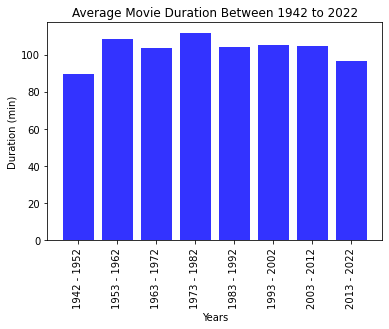

In [39]:
#Create a bar chart of movie duration (min) between 1942 and 2022. 

fig, ax = plt.subplots()

#Create values for bar chart  
years_decade_barchart = ["1942 - 1952","1953 - 1962","1963 - 1972","1973 - 1982","1983 - 1992","1993 - 2002","2003 - 2012","2013 - 2022"]
counts_avgd = [89.6, 108.5, 103.5, 111.8, 104.4, 105.2, 104.7, 96.8]
ax.bar(years_decade_barchart, counts_avgd, color='b', alpha=0.8, align='center')

#Label axes and title
ax.set_ylabel("Duration (min)")
ax.set_title ("Average Movie Duration Between 1942 to 2022")
plt.xticks(rotation="vertical")
plt.xlabel("Years")

#Add percentage to bar graph 


#Show plot
plt.show()


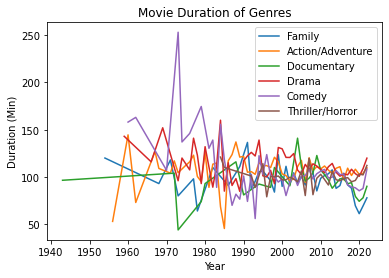

In [40]:
# Movie Duration of Genres Between 1940-2022 Option 1

# Group durations by genre
genre_durations_grouped = df_cleaned.groupby(df_cleaned['Category'])

# This is line 
family_x = genre_durations_grouped.get_group('Family').groupby('Year').mean().index
family_y = genre_durations_grouped.get_group('Family').groupby('Year').mean()['Duration (Min)']
action_x = genre_durations_grouped.get_group('Action/Adventure').groupby('Year').mean().index
action_y = genre_durations_grouped.get_group('Action/Adventure').groupby('Year').mean()['Duration (Min)']
documentary_x = genre_durations_grouped.get_group('Documentary').groupby('Year').mean().index
documentary_y = genre_durations_grouped.get_group('Documentary').groupby('Year').mean()['Duration (Min)']
drama_x = genre_durations_grouped.get_group('Drama').groupby('Year').mean().index
drama_y = genre_durations_grouped.get_group('Drama').groupby('Year').mean()['Duration (Min)']
comedy_x = genre_durations_grouped.get_group('Comedy').groupby('Year').mean().index
comedy_y = genre_durations_grouped.get_group('Comedy').groupby('Year').mean()['Duration (Min)']
thriller_x = genre_durations_grouped.get_group('Thriller/Horror').groupby('Year').mean().index
thriller_y = genre_durations_grouped.get_group('Thriller/Horror').groupby('Year').mean()['Duration (Min)']

plt.plot(family_x, family_y, label = 'Family')
plt.plot(action_x, action_y, label = 'Action/Adventure')
plt.plot(documentary_x, documentary_y, label = 'Documentary')
plt.plot(drama_x, drama_y, label = "Drama")
plt.plot(comedy_x, comedy_y, label = "Comedy")
plt.plot(thriller_x, thriller_y, label = "Thriller/Horror")
plt.xlabel('Year')
plt.ylabel('Duration (Min)')
plt.title('Movie Duration of Genres')

plt.legend(loc='best')

plt.savefig('Genre_Duration_byYear1.png')
plt.show()

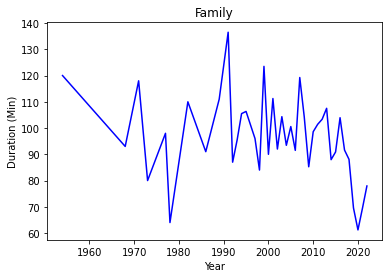

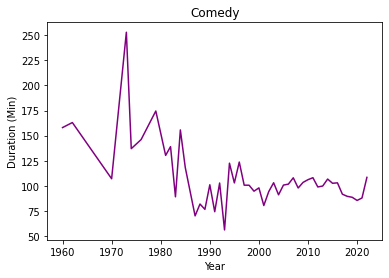

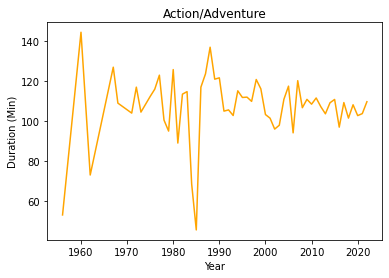

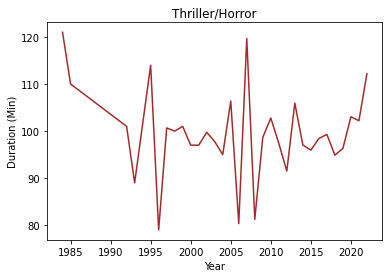

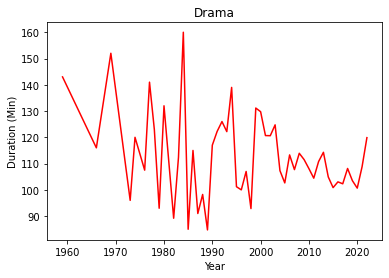

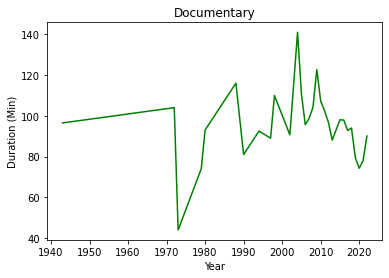

In [41]:
# Movie Duration of Genres Between 1940-2022 Option 2
genre_durations_grouped.get_group('Family').groupby('Year').mean().plot(c='blue',ylabel = 'Duration (Min)',legend = False,title='Family')
genre_durations_grouped.get_group('Comedy').groupby('Year').mean().plot(c='purple',ylabel = 'Duration (Min)',legend = False,title='Comedy')
genre_durations_grouped.get_group('Action/Adventure').groupby('Year').mean().plot(c='orange',ylabel = 'Duration (Min)',legend = False,title='Action/Adventure')
genre_durations_grouped.get_group('Thriller/Horror').groupby('Year').mean().plot(c='brown',ylabel = 'Duration (Min)',legend = False,title='Thriller/Horror')
genre_durations_grouped.get_group('Drama').groupby('Year').mean().plot(c='red',ylabel = 'Duration (Min)',legend = False,title='Drama')
genre_durations_grouped.get_group('Documentary').groupby('Year').mean().plot(c='green',ylabel = 'Duration (Min)',legend = False,title='Documentary')

plt.savefig('Genre_Duration_byYear2.png')
plt.show()

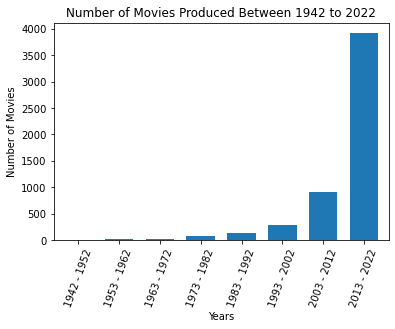

In [42]:
#Create Barplot for movies produced between 1942 to 2022 to demonstrate the distribution of movies in our dataset. 
bar_plot = df_year_binned["Decade"].value_counts().plot.bar(width=0.7, rot=70)

#Set Labels 
bar_plot.set_xlabel("Years")
bar_plot.set_ylabel("Number of Movies")
bar_plot.set_title ("Number of Movies Produced Between 1942 to 2022")


#Reformat x-axis to be palatable for viewers 
plt.gca().invert_xaxis()


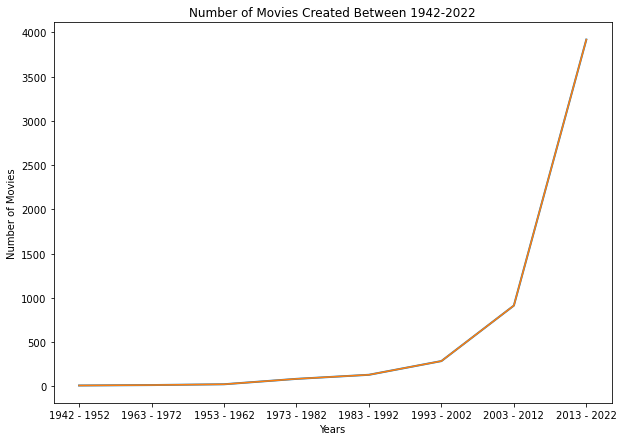

In [43]:
# Create Barplot for movies produced between 1942 to 2022 to demonstrate the distribution of movies in our dataset. 
mylist =df_year_binned["Decade"].unique()


mylist = [str(x) for x in mylist]
# print(mylist)
newlist = [x for x in mylist if x != 'nan']
# print(newlist)
x=newlist

y=[]

for i in range(0,len(df_year_binned["Decade"])):
    if i<8:
        y. append(df_year_binned["Decade"].value_counts()[i])
 
  
# plot
fig, ax = plt.subplots(figsize=(10,7))

ax.plot(x, y, linewidth=2.0)

line, = ax.plot(x, y)

plt.gca().invert_xaxis()
plt.ylabel('Number of Movies')
plt.xlabel('Years')
plt.title('Number of Movies Created Between 1942-2022')
# plt.grid()
# plt.legend()       

def animate(i):
    line.set_ydata(y)  # update the data.
    return line,

ani = animation.FuncAnimation(
    fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use e.g.

ani.save("movie.mp4")

In [44]:
#Binning by duration
bins = [0,60,90,120,150,180,210,240,270,300,330]
group_labels = ["0-59","60-89","90-119","120-149","150-179","180-219","220-239","240-269","270-299","300-330"]
df_duration_binned = df_cleaned.copy()
df_duration_binned["Duration"] = pd.cut(df_duration_binned["Duration (Min)"], bins, labels = group_labels)
df_duration_groupby = df_duration_binned.groupby("Duration")
df_duration_groupby["Duration (Min)"].mean()


Duration
0-59        40.126050
60-89       79.432258
90-119     103.570266
120-149    131.777633
150-179    161.883117
180-219    192.117647
220-239    227.700000
240-269    253.000000
270-299    273.000000
300-330    312.000000
Name: Duration (Min), dtype: float64

Text(0.5, 1.0, 'Movie Duration')

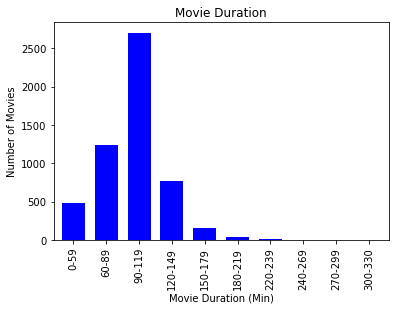

In [45]:
#Create a bar chart to demonstrate average duration of movies in dataset. 

bar_plot = df_duration_binned["Duration"].value_counts(sort=False).plot.bar(width=0.7, rot=90, color='b')

#Set Labels 
bar_plot.set_xlabel("Movie Duration (Min)")
bar_plot.set_ylabel("Number of Movies")
bar_plot.set_title ("Movie Duration")



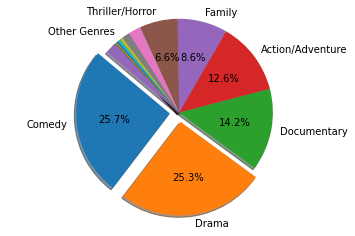

In [46]:
#Question 2 - Movie Genres 

#What is the distribution of Movie genres in our dataset? 

#Create Pie Chart to visualize the data 

#Labels for the sections of the pie chart 
labels = ["Comedy", "Drama", "Documentary", "Action/Adventure", "Family", "Thriller/Horror", "", "", "Other Genres", "", "", "", "", "", ""]
# labels = ["Comedy", "Drama", "Docuementary", "Action/Adventure", "Family", "Thriller/Horror", "International", "Classics", "Anime", "Music", "Romance", "Fantasy", "Crime", "Science-Fiction", "Others"]
#The values of each section for the pie chart 
sizes = [1387, 1365, 763, 677, 466, 354, 117, 73, 28, 23, 17, 11, 8, 1, 102]

#Matplot to separate Comedy & Drama from the pie chart 
# explode = (0, 0, 0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0)
explode = (0.1, 0.1, 0,0,0,0,0,0,0,0,0,0,0,0,0)

#create pie chart and turn into percentages 
def my_autopct(pct):
    return ('%1.1f%%' % pct) if pct > 6 else ''

plt.pie(sizes, explode=explode, labels=labels, autopct=my_autopct, shadow=True, startangle=140)
plt.axis("equal")
plt.show()

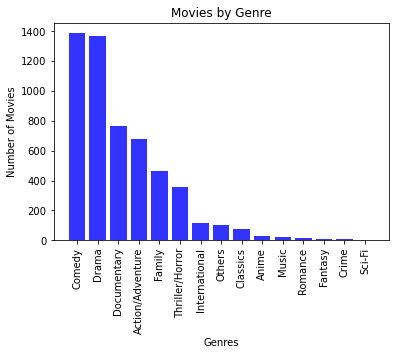

In [47]:
#Pie Chart not appropriate demonstration due to >10 categories therefore will produce a histogram to demonstrate the distribution of genres. 

fig, ax = plt.subplots()

#Create values for pie chart 
Genres = ["Comedy", "Drama", "Documentary", "Action/Adventure", "Family", "Thriller/Horror", "International", "Others", "Classics", "Anime", "Music", "Romance", "Fantasy", "Crime", "Sci-Fi"]
counts = [1387, 1365, 763, 677, 466, 354, 117, 102, 73, 28, 23, 17,11,8,1]
ax.bar(Genres, counts, color='b', alpha=0.8, align='center')

#Label axes and title
ax.set_ylabel("Number of Movies")
ax.set_title ("Movies by Genre")
plt.xticks(rotation="vertical")
plt.xlabel("Genres")

#Add percentage to bar graph 


#Show plot
plt.show()

In [48]:
#Create a dataframe for the summary statistics of movie genres by minutes

#summary statistics 
mean = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).mean()
median = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).median()
var = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).var()
std = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).std()
sem = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category']).sem()

summary_stat= pd.DataFrame(
                        [{"Average Movie Duration (min)": mean,
                           "Median Movie Duration (min)": median,
                          "Duration variance": var, 
                          "Duration standard deviation": std,
                          "Movie Duration: Standard error": sem}])
summary_stat.head()

,Average Movie Duration (min),Median Movie Duration (min),Duration variance,Duration standard deviation,Movie Duration: Standard error
0,Category Action/Adventure 106.454948 Anime ...,Category Action/Adventure 103.0 Anime ...,Category Action/Adventure 833.390349 Anime...,Category Action/Adventure 28.868501 Anime ...,Category Action/Adventure 1.109507 Anime ...


In [49]:
#create average duration (min) for each genre 
mean 

Category
Action/Adventure    106.454948
Anime                99.214286
Classics             98.178082
Comedy               96.692862
Crime               114.125000
Documentary          90.904325
Drama               105.972161
Family               88.615880
Fantasy              97.272727
International       104.170940
Music                98.695652
Others               89.705882
Romance             108.235294
Science-Fiction     109.000000
Thriller/Horror      99.194915
Name: Duration (Min), dtype: float64

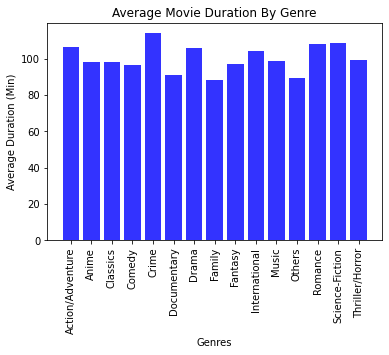

In [50]:
fig, ax = plt.subplots()

#Create values for bar chart
Genres = ["Action/Adventure","Anime", "Classics","Comedy", "Crime","Documentary","Drama","Family", "Fantasy","International","Music","Others","Romance","Science-Fiction", "Thriller/Horror"]
Minutes = [106.45,98.21,98.17,96.69,114.12,90.90,105.97,88.61,97.27,104.17,98.69,89.70,108.23,109.00,99.19]
ax.bar(Genres, Minutes, color='b', alpha=0.8, align='center')

#Label axes and title
ax.set_ylabel("Average Duration (Min)")
ax.set_title ("Average Movie Duration By Genre")
plt.xticks(rotation="vertical")
plt.xlabel("Genres")

#Show plot
plt.show()

In [51]:
#Statistics - Which columns have the lowest average movie Duration? the longest? Is there a signficiant difference between movie run times between genres? 


In [52]:
#Scatterplot with multiple lines for different genres by year (x-axis) and minute duration (y-axis) to observe if movie genre lengths changed overtime.


<function matplotlib.pyplot.show(close=None, block=None)>

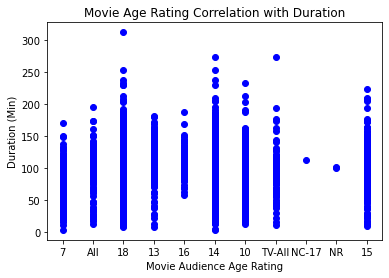

In [53]:
#Question 3 Do average movie times differ based on movie rating systems (PG, PG-13, TV-14A, R)? 

#Does the age rating correlate with the length of the movie? (scatterplot with linear cor. Ratings on x-axis and length by minutes on y) 

x_ax = df_cleaned["Rating"]
dur = df_cleaned ["Duration (Min)"]

fig1, ax1 = plt.subplots()
plt.title ("Movie Age Rating Correlation with Duration")
plt.scatter(x_ax, dur, marker = 'o', color="blue")
plt.xlabel("Movie Audience Age Rating")
plt.ylabel("Duration (Min)")


plt.show

# Average movie time on Movie ratings (PG, PG-13, TV-14A, R)


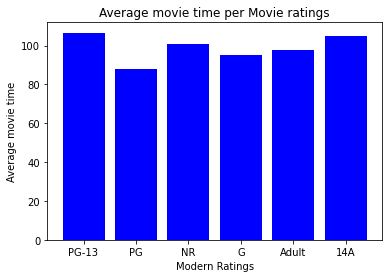

In [60]:
#Do average movie time differ based on Movie ratings (PG, PG-13, TV-14A, R)?

average = df_cleaned.groupby(["Modern Rating"])["Duration (Min)"].mean().map("{:.2f}".format)
    
y=[105.04,97.87,95.36,101.00,88.02,106.63]

# for i in range(len(average)):
#     y.append(average[i])
    
x = ['14A', 'Adult', 'G', 'NR', 'PG', 'PG-13']

# y
rating_df=pd.DataFrame({"Modern Rating":x, "Average":y})

plt.bar(x, y, color="b", align="center")
plt.title("Average movie time per Movie ratings")
plt.xlabel("Modern Ratings")
plt.ylabel("Average movie time")
# plt.figure(figsize=(12,6))
plt.savefig("average movie time.png")
plt.gca().invert_xaxis()

plt.show()

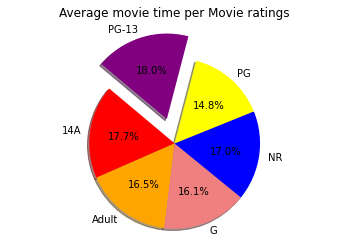

In [61]:
# Labels for the sections of our pie chart
labels =['14A', 'Adult', 'G', 'NR', 'PG', 'PG-13']

# The values of each section of the pie chart
sizes = y

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "blue","yellow","purple"]

# Tells matplotlib to separate the "PG-13" section from the others
explode = (0, 0, 0, 0,0,0.3)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("Average movie time per Movie ratings")
plt.savefig("average movie time2.png")

# Age ratings for the top 4 genres

In [62]:
#What are the age ratings by top the top 4 genres?

# average = df_cleaned.groupby(["Category"])["Rating"].mean()
# # average

df_cleaned

,Name,Year,Rating,Category,Duration (Min),Modern Rating
40,Inside the Mind of a Cat,2022,7,Family,67,PG
45,Larva Pendant,2022,7,Family,33,PG
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90,PG
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24,G
50,Rescued by Ruby,2022,7,Family,93,PG
...,...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93,PG
8855,Zinzana,2015,10,Drama,90,PG
8857,Zombieland,2009,18,Comedy,114,Adult
8858,Zoom,2006,15,Family,107,14A


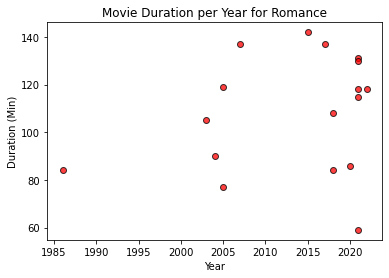

In [63]:
rom_df=df_cleaned.loc[(df_cleaned['Category']=="Romance")]
xs=rom_df["Year"]
ys=rom_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Romance")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")
plt.savefig("Movie Duration per Year for Romance.png")


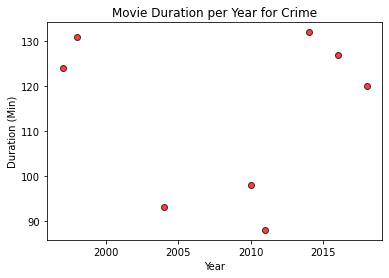

In [64]:
cri_df=df_cleaned.loc[(df_cleaned['Category']=="Crime")]
xs=cri_df["Year"]
ys=cri_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Crime")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")
plt.savefig("Movie Duration per Year for Crime.png")

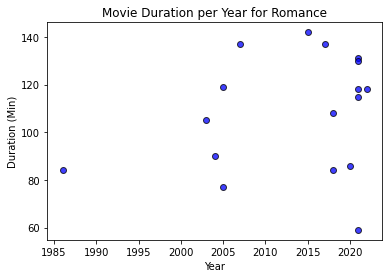

In [65]:
rom_df=df_cleaned.loc[(df_cleaned['Category']=="Romance")]
xs=rom_df["Year"]
ys=rom_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Romance")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")
plt.savefig("Movie Duration per Year for Romance.png")

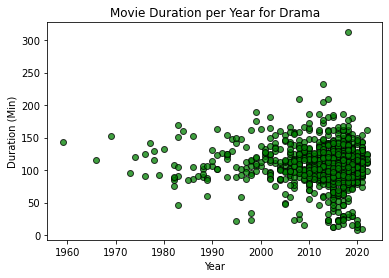

In [66]:
dram_df=df_cleaned.loc[(df_cleaned['Category']=="Drama")]
xs=dram_df["Year"]
ys=dram_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Drama")
plt.xlabel("Year")
plt.ylabel("Duration (Min)")

plt.savefig("Movie Duration per Year for Drama.png")


Text(0, 0.5, 'Duration (Min)')

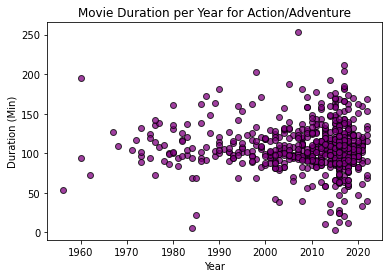

In [67]:
act_df=df_cleaned.loc[(df_cleaned['Category']=="Action/Adventure")]
xs=act_df["Year"]
ys=act_df['Duration (Min)']
plt.scatter(xs, ys, marker="o", facecolors="purple", edgecolors="black", alpha=0.75)
plt.title("Movie Duration per Year for Action/Adventure")
plt.xlabel("Year")

plt.ylabel("Duration (Min)")
# plt.savefig("Movie Duration per Year for Action/Adventure.png")

In [68]:
genre6_df=df_cleaned.loc[(df_cleaned['Category']=="Thriller/Horror")|(df_cleaned['Category']=="Comedy")|(df_cleaned['Category']=="Action/Adventure")|
                         (df_cleaned['Category']=="Drama")|(df_cleaned['Category']=="Family")|(df_cleaned['Category']=="Documentary")]

genre6_df


,Name,Year,Rating,Category,Duration (Min),Modern Rating
40,Inside the Mind of a Cat,2022,7,Family,67,PG
45,Larva Pendant,2022,7,Family,33,PG
47,My Little Pony: A New Alleneration: SinAll-Alo...,2022,7,Family,90,PG
48,Chip and Potato: Chip’s Holiday,2022,All,Family,24,G
50,Rescued by Ruby,2022,7,Family,93,PG
...,...,...,...,...,...,...
8854,Zenda,2009,10,Drama,93,PG
8855,Zinzana,2015,10,Drama,90,PG
8857,Zombieland,2009,18,Comedy,114,Adult
8858,Zoom,2006,15,Family,107,14A


In [69]:
genreR=genre6_df.loc[(genre6_df['Category']=="Documentary")]
genre_n=genreR.groupby("Rating").count()

genre_n['Category']

Rating
10         76
13         34
14        170
15         59
16          6
18        347
7          27
All        20
NR          1
TV-All     23
Name: Category, dtype: int64

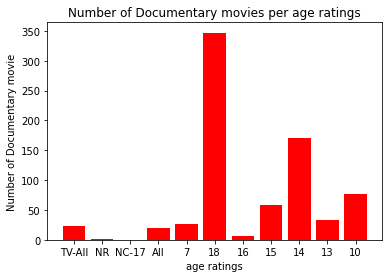

In [70]:
y=[76,34,170,59,6,347,27,20,0,1,23]

x = ['10','13', '14','15', '16', '18', '7', 'All','NC-17','NR','TV-All']


rating_df=pd.DataFrame({"Modern Rating":x, "Average":y})

plt.bar(x, y, color="r", align="center")
plt.title("Number of Documentary movies per age ratings")
plt.xlabel("age ratings")
plt.ylabel("Number of Documentary movie")
# plt.figure(figsize=(12,6))
plt.savefig("Number of movies per age ratings1.png")

plt.gca().invert_xaxis()

plt.show()


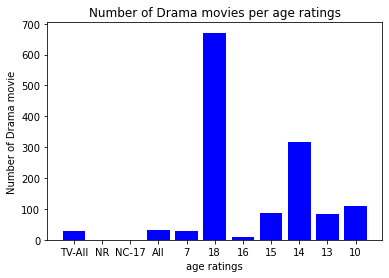

In [71]:
genre8=genre6_df.loc[(genre6_df['Category']=="Drama")]
genre_D=genre8.groupby("Rating").count()

x = ['10', '13', '14', '15', '16','18','7', 'All','NC-17','NR','TV-All']

y=[108,84,318,87,9,671,28,33,0,0,27]

rating_df=pd.DataFrame({"Modern Rating":x, "Average":y})

plt.bar(x, y, color="b", align="center")
plt.title("Number of Drama movies per age ratings")
plt.xlabel("age ratings")
plt.ylabel("Number of Drama movie")
# plt.figure(figsize=(12,6))
plt.savefig("Number of movies per age ratings2.png")

plt.gca().invert_xaxis()

plt.show()

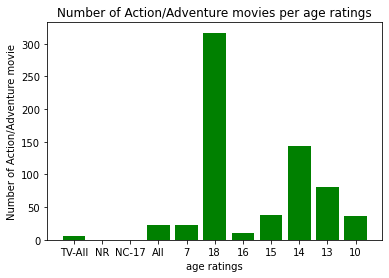

In [72]:
genre9=genre6_df.loc[(genre6_df['Category']=="Action/Adventure")]
genre_A=genre9.groupby("Rating").count()
genre_A['Category']

x = ['10', '13', '14', '15', '16','18','7', 'All','NC-17','NR','TV-All']

y=[36,81,143,38,10,317,23,23,0,0,6]

rating_df=pd.DataFrame({"Modern Rating":x, "Average":y})

plt.bar(x, y, color="g", align="center")
plt.title("Number of Action/Adventure movies per age ratings")
plt.xlabel("age ratings")
plt.ylabel("Number of Action/Adventure movie")
# plt.figure(figsize=(12,6))
plt.savefig("Number of movies per age ratings3.png")

plt.gca().invert_xaxis()

plt.show()

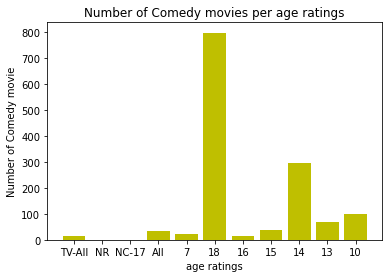

In [73]:
genre10=genre6_df.loc[(genre6_df['Category']=="Comedy")]
genre_S=genre10.groupby("Rating").count()
genre_S['Category']

x = ['10', '13', '14', '15', '16','18','7', 'All','NC-17','NR','TV-All']

y=[101,67,298,36,15,799,21,33,1,0,16]

rating_df=pd.DataFrame({"Modern Rating":x, "Average":y})

plt.bar(x, y, color="y", align="center")
plt.title("Number of Comedy movies per age ratings")
plt.xlabel("age ratings")
plt.ylabel("Number of Comedy movie")
# plt.figure(figsize=(12,6))
plt.savefig("Number of movies per age ratings4.png")

plt.gca().invert_xaxis()

plt.show()


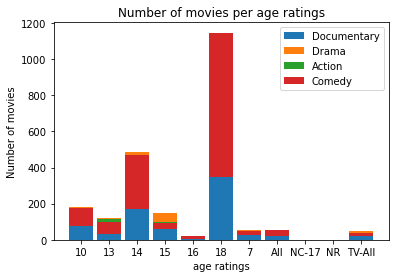

In [74]:

labels = ['10', '13', '14', '15', '16','18','7', 'All','NC-17','NR','TV-All']
Documentary = [76,34,170,59,6,347,27,20,0,1,23]
Drama = [108,84,318,87,9,671,28,33,0,0,27]
Action = [36,81,143,38,10,317,23,23,0,0,6]
Comedy = [101,67,298,36,15,799,21,33,1,0,16]
width = 0.85       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, Documentary, width, label='Documentary')
ax.bar(labels, Drama, width, bottom=Documentary,
       label='Drama')

ax.bar(labels, Action, width, bottom=Documentary,
       label='Action')

ax.bar(labels, Comedy, width, bottom=Documentary,
       label='Comedy')

ax.set_ylabel('Number of movies')
ax.set_xlabel('age ratings')
ax.set_title('Number of movies per age ratings')
ax.legend()

plt.savefig("Number of movies per age ratings5.png")
plt.show()

In [55]:
# Anova test - confirm no statistical significance between genres and duration 

#Extract list of genres
genre_list = df_cleaned['Category'].unique()

# Group durations by genre
genre_durations_grouped = df_cleaned['Duration (Min)'].groupby(df_cleaned['Category'])

genre_durations = [genre_durations_grouped.get_group(genre) for genre in genre_list ]

len(genre_durations)
# Anova test 
stats.f_oneway(genre_durations[0],genre_durations[11],genre_durations[2],genre_durations[3],genre_durations[4],\
              genre_durations[5],genre_durations[6],genre_durations[7],genre_durations[8],genre_durations[9],\
              genre_durations[10],genre_durations[11],genre_durations[12],genre_durations[13],genre_durations[14])


F_onewayResult(statistic=19.5774252880989, pvalue=6.452695703824926e-49)

In [56]:
genre_max = [genre_durations_grouped.get_group(genre).max() for genre in genre_list ]
genre_min = [genre_durations_grouped.get_group(genre).min() for genre in genre_list ]
genre_avg = [genre_durations_grouped.get_group(genre).mean() for genre in genre_list ]
print(genre_list)
print(genre_avg)
# print(genre_max)
# print(genre_min)

['Family' 'Romance' 'Thriller/Horror' 'Others' 'Action/Adventure' 'Comedy'
 'International' 'Science-Fiction' 'Anime' 'Documentary' 'Drama' 'Crime'
 'Music' 'Fantasy' 'Classics']
[88.61587982832619, 108.23529411764706, 99.19491525423729, 89.70588235294117, 106.4549483013294, 96.69286229271809, 104.17094017094017, 109.0, 99.21428571428571, 90.9043250327654, 105.97216117216117, 114.125, 98.69565217391305, 97.27272727272727, 98.17808219178082]


In [57]:
# t test between first decade bin avg, and the last bin average 

duration_firstbin = df_year_groupby.get_group('1942 - 1952')['Duration (Min)']
duration_lastbin = df_year_groupby.get_group('2013 - 2022')['Duration (Min)']
stats.ttest_ind(duration_firstbin, duration_lastbin, equal_var=False)

Ttest_indResult(statistic=-0.9034414226310628, pvalue=0.3873930687713172)